# Notebook Preprocessing Data

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
%cd /content/drive/My Drive/Colab Notebooks/Praktikum Pemrograman 5

/content/drive/My Drive/Colab Notebooks/Praktikum Pemrograman 5


In [28]:
ls

'10 Association Rule Apriori and FP-Growth.ipynb'            'Data SLR.csv'
'11 Text Mining.ipynb'                                        decision_tree.jpg
'1 Python and Data Mining Introduction .ipynb'                diabetes.csv
'2 Preprocessing Data.ipynb'                                 'Groceries Association Rule.csv'
'3 EDA Diabetes Data.ipynb'                                  'House Price MLR.csv'
'4a Simple Linear Regression.ipynb'                           Mall_Customers.xlsx
'4b Multivariate Linear Regression.ipynb'                     output.csv
'5 Diabetes Classification using KNN & Naive Bayes .ipynb'    output.xlsx
'6 Diabetes Classification using Decision Tree & SVM.ipynb'   sales.db
'7 Diabetes Classification using Random Forest.ipynb'         sales.sql
'9 Clustering using K-Means and K-Medoids.ipynb'              spam.csv
'Clustering data.csv'                                        'Tugas Praktikum.gslides'
'Clustering K-Means dan K-Medoids.ipynb'


In [29]:
path = "/content/drive/My Drive/Colab Notebooks/Praktikum Pemrograman 5"

# Read and Write file CSV, XLXS, SQL

In [30]:
import pandas as pd
import sqlite3

# Membaca file CSV
df_csv = pd.read_csv(path + '/Data SLR.csv')
print("Data dari file CSV:")
df_csv

Data dari file CSV:


,Unnamed: 0,horsepower,price
0,0,111.0,13495.0
1,1,111.0,16500.0
2,2,154.0,16500.0
3,3,102.0,13950.0
4,4,115.0,17450.0
...,...,...,...
195,200,114.0,16845.0
196,201,160.0,19045.0
197,202,134.0,21485.0
198,203,106.0,22470.0


In [31]:
# Membaca file Excel
df_excel = pd.read_excel(path + '/Mall_Customers.xlsx')
print("\nData dari file Excel:")
print(df_excel.head())


Data dari file Excel:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [32]:
# Membuat file SQL
from sqlite3 import connect
conn = connect(':memory:')
df = pd.DataFrame(data=[[0, '10/11/12'], [1, '12/11/10']],
                   columns=['int_column', 'date_column'])
df.to_sql(name='test_data', con=conn)
df

,int_column,date_column
0,0,10/11/12
1,1,12/11/10


In [33]:
# Membaca file SQL
pd.read_sql('SELECT int_column, date_column FROM test_data', conn)

,int_column,date_column
0,0,10/11/12
1,1,12/11/10


In [34]:
# Membuat data SQL
conn = connect(':memory:')
data = {
    'id': range(1, 21),
    'nama': ['Andi', 'Budi', 'Citra', 'Dedi', 'Eka', 'Fani', 'Gita', 'Hani', 'Iwan', 'Joko', 'Andi', 'Budi', 'Citra', None, None, None, 'Udi', 'Tami', 'Andi', 'Budi'],
    'umur': [25, 30, 22, 35, 28, 29, 31, 27, 33, 26, 25, 30, 22, None, None, None, 100, 80, 200, 150],
    'kota': ['Jakarta', 'Bandung', 'Surabaya', 'Yogyakarta', 'Semarang', 'Medan', 'Makassar', 'Denpasar', 'Palembang', 'Malang', 'Jakarta', 'Bandung', 'Surabaya', None, None, None, 'Lombok', 'Garut', 'Jakarta', 'Bandung'],
    'gaji': [5000000, 6000000, 4500000, 7000000, 5500000, 5800000, 6200000, 5200000, 6800000, 5700000, 5000000, 6000000, 4500000, None, None, None, 1000000, 9999999, 100000000, 200000000]
}

df = pd.DataFrame(data)

# Menulis DataFrame ke tabel SQL
df.to_sql(name='karyawan', con=conn)

20

In [35]:
# Contoh Query SQL
query = "SELECT * FROM karyawan"
result = pd.read_sql(query, conn)
result

,index,id,nama,umur,kota,gaji
0,0,1,Andi,25.0,Jakarta,5000000.0
1,1,2,Budi,30.0,Bandung,6000000.0
2,2,3,Citra,22.0,Surabaya,4500000.0
3,3,4,Dedi,35.0,Yogyakarta,7000000.0
4,4,5,Eka,28.0,Semarang,5500000.0
5,5,6,Fani,29.0,Medan,5800000.0
6,6,7,Gita,31.0,Makassar,6200000.0
7,7,8,Hani,27.0,Denpasar,5200000.0
8,8,9,Iwan,33.0,Palembang,6800000.0
9,9,10,Joko,26.0,Malang,5700000.0


In [36]:
# Menyimpan DataFrame ke file CSV
df.to_csv('output.csv', index=False)  # index=False untuk tidak menyimpan indeks baris
print("DataFrame berhasil disimpan ke file output.csv")


DataFrame berhasil disimpan ke file output.csv


In [37]:
df

,id,nama,umur,kota,gaji
0,1,Andi,25.0,Jakarta,5000000.0
1,2,Budi,30.0,Bandung,6000000.0
2,3,Citra,22.0,Surabaya,4500000.0
3,4,Dedi,35.0,Yogyakarta,7000000.0
4,5,Eka,28.0,Semarang,5500000.0
5,6,Fani,29.0,Medan,5800000.0
6,7,Gita,31.0,Makassar,6200000.0
7,8,Hani,27.0,Denpasar,5200000.0
8,9,Iwan,33.0,Palembang,6800000.0
9,10,Joko,26.0,Malang,5700000.0


In [38]:
# Menyimpan DataFrame ke file Excel
df.to_excel('output.xlsx', index=False, sheet_name='Sheet1')
print("DataFrame berhasil disimpan ke file output.xlsx")


DataFrame berhasil disimpan ke file output.xlsx


# Cleaning Data

In [39]:
# drop id pada df

df = df.drop('id', axis=1)
df


,nama,umur,kota,gaji
0,Andi,25.0,Jakarta,5000000.0
1,Budi,30.0,Bandung,6000000.0
2,Citra,22.0,Surabaya,4500000.0
3,Dedi,35.0,Yogyakarta,7000000.0
4,Eka,28.0,Semarang,5500000.0
5,Fani,29.0,Medan,5800000.0
6,Gita,31.0,Makassar,6200000.0
7,Hani,27.0,Denpasar,5200000.0
8,Iwan,33.0,Palembang,6800000.0
9,Joko,26.0,Malang,5700000.0


In [40]:
# Cek data duplikat
duplicated_rows = df[df.duplicated()]
print("Data duplikat:")
print(duplicated_rows)

# Cek missing value
missing_values = df.isnull().sum()
print("\nJumlah missing value pada setiap kolom:")
print(missing_values)

Data duplikat:
     nama  umur      kota       gaji
10   Andi  25.0   Jakarta  5000000.0
11   Budi  30.0   Bandung  6000000.0
12  Citra  22.0  Surabaya  4500000.0
14   None   NaN      None        NaN
15   None   NaN      None        NaN

Jumlah missing value pada setiap kolom:
nama    3
umur    3
kota    3
gaji    3
dtype: int64


In [41]:
# Mengatasi data duplikat dengan menghapusnya
df_no_duplicates = df.drop_duplicates()
print("Data setelah menghapus duplikat:")
print(df_no_duplicates)

Data setelah menghapus duplikat:
     nama   umur        kota         gaji
0    Andi   25.0     Jakarta    5000000.0
1    Budi   30.0     Bandung    6000000.0
2   Citra   22.0    Surabaya    4500000.0
3    Dedi   35.0  Yogyakarta    7000000.0
4     Eka   28.0    Semarang    5500000.0
5    Fani   29.0       Medan    5800000.0
6    Gita   31.0    Makassar    6200000.0
7    Hani   27.0    Denpasar    5200000.0
8    Iwan   33.0   Palembang    6800000.0
9    Joko   26.0      Malang    5700000.0
13   None    NaN        None          NaN
16    Udi  100.0      Lombok    1000000.0
17   Tami   80.0       Garut    9999999.0
18   Andi  200.0     Jakarta  100000000.0
19   Budi  150.0     Bandung  200000000.0


In [42]:
# Mengatasi missing value dengan mengisi nilai yang hilang dengan mean/median/modus
# Misalnya, mengisi missing value pada kolom 'umur' dengan median
median_umur = df_no_duplicates['umur'].median()
df_no_duplicates['umur'].fillna(median_umur, inplace=True)

# Mengisi missing value pada kolom 'kota' dengan modus
modus_kota = df_no_duplicates['kota'].mode()[0]
df_no_duplicates['kota'].fillna(modus_kota, inplace=True)

# Mengisi missing value pada kolom 'gaji' dengan mean
mean_gaji = df_no_duplicates['gaji'].mean()
df_no_duplicates['gaji'].fillna(mean_gaji, inplace=True)

# Cek kembali missing value setelah penanganan
missing_values_after_handling = df_no_duplicates.isnull().sum()
print("\nJumlah missing value setelah penanganan:")
print(missing_values_after_handling)

print("\nDataFrame setelah penanganan duplikat dan missing value:")
df_no_duplicates



Jumlah missing value setelah penanganan:
nama    1
umur    0
kota    0
gaji    0
dtype: int64

DataFrame setelah penanganan duplikat dan missing value:


<ipython-input-42-cc57f958d138>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['umur'].fillna(median_umur, inplace=True)
<ipython-input-42-cc57f958d138>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['kota'].fillna(modus_kota, inplace=True)
<ipython-input-42-cc57f958d138>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['gaji'].fillna(mean_gaji, inplace=True)


,nama,umur,kota,gaji
0,Andi,25.0,Jakarta,5.000000e+06
1,Budi,30.0,Bandung,6.000000e+06
2,Citra,22.0,Surabaya,4.500000e+06
3,Dedi,35.0,Yogyakarta,7.000000e+06
4,Eka,28.0,Semarang,5.500000e+06
5,Fani,29.0,Medan,5.800000e+06
6,Gita,31.0,Makassar,6.200000e+06
7,Hani,27.0,Denpasar,5.200000e+06
8,Iwan,33.0,Palembang,6.800000e+06
9,Joko,26.0,Malang,5.700000e+06


In [43]:
# Mengatasi missing value nama dengan mengisi nilai yang hilang dengan "Nyoman"
df = df_no_duplicates.fillna("Nyoman")

print("\nDataFrame setelah mengisi missing value dengan 'Nyoman':")
df



DataFrame setelah mengisi missing value dengan 'Nyoman':


,nama,umur,kota,gaji
0,Andi,25.0,Jakarta,5.000000e+06
1,Budi,30.0,Bandung,6.000000e+06
2,Citra,22.0,Surabaya,4.500000e+06
3,Dedi,35.0,Yogyakarta,7.000000e+06
4,Eka,28.0,Semarang,5.500000e+06
5,Fani,29.0,Medan,5.800000e+06
6,Gita,31.0,Makassar,6.200000e+06
7,Hani,27.0,Denpasar,5.200000e+06
8,Iwan,33.0,Palembang,6.800000e+06
9,Joko,26.0,Malang,5.700000e+06


In [44]:
# Cek outlier (contoh menggunakan IQR untuk kolom 'umur' dan 'gaji')
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

outliers_umur = detect_outliers_iqr(df['umur'])
outliers_gaji = detect_outliers_iqr(df['gaji'])

print("\nOutlier pada kolom 'umur':")
print(outliers_umur)
print("\nOutlier pada kolom 'gaji':")
print(outliers_gaji)



Outlier pada kolom 'umur':
18    200.0
19    150.0
Name: umur, dtype: float64

Outlier pada kolom 'gaji':
13    2.633571e+07
18    1.000000e+08
19    2.000000e+08
Name: gaji, dtype: float64


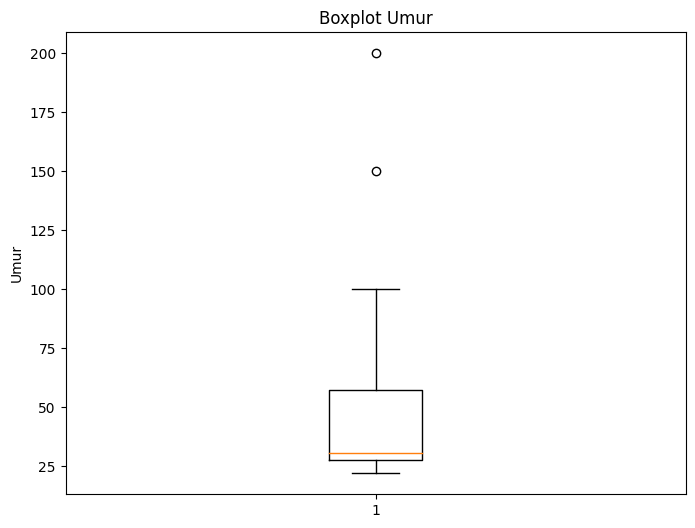

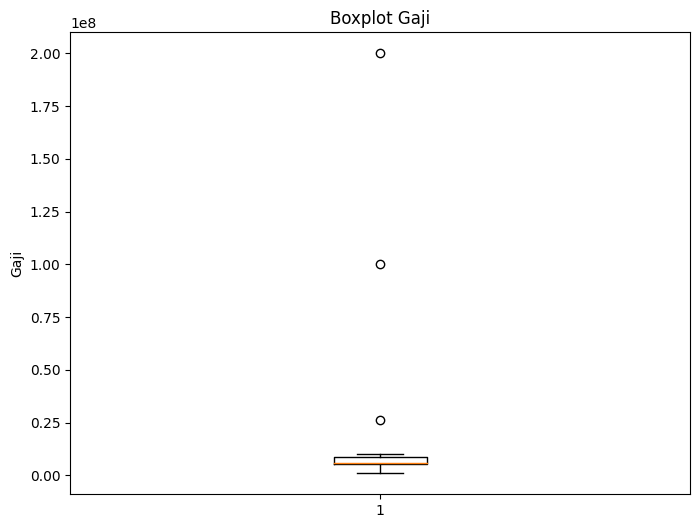

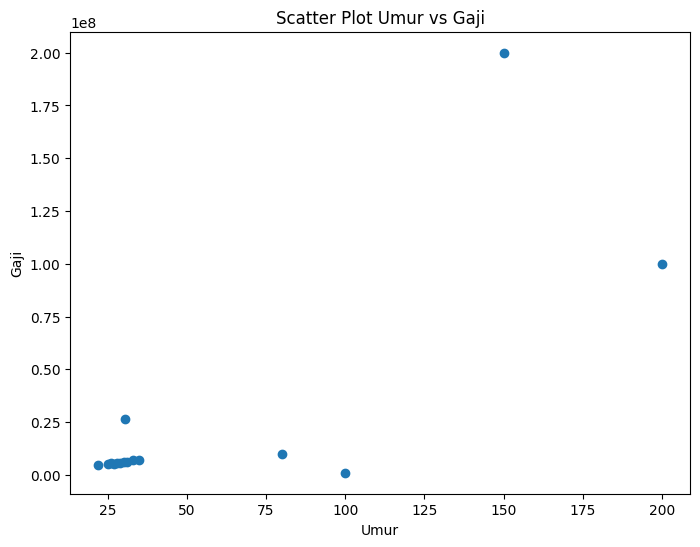

In [45]:
import matplotlib.pyplot as plt

# Membuat diagram boxplot untuk kolom 'umur'
plt.figure(figsize=(8, 6))
plt.boxplot(df['umur'])
plt.title('Boxplot Umur')
plt.ylabel('Umur')
plt.show()

# Membuat diagram boxplot untuk kolom 'gaji'
plt.figure(figsize=(8, 6))
plt.boxplot(df['gaji'])
plt.title('Boxplot Gaji')
plt.ylabel('Gaji')
plt.show()

# Membuat scatter plot untuk melihat outlier pada umur dan gaji
plt.figure(figsize=(8, 6))
plt.scatter(df['umur'], df['gaji'])
plt.title('Scatter Plot Umur vs Gaji')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.show()


In [46]:
# Menghapus outlier pada kolom 'umur' dan 'gaji' (contoh menggunakan IQR)
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
    return data_no_outliers

df_no_outliers_umur = remove_outliers_iqr(df['umur'])
df_no_outliers_gaji = remove_outliers_iqr(df['gaji'])

# Gabungkan data yang sudah dihapus outliernya ke dalam DataFrame
df = df[(df['umur'].isin(df_no_outliers_umur)) & (df['gaji'].isin(df_no_outliers_gaji))]
print("\nDataFrame setelah menghapus outlier:")
df


DataFrame setelah menghapus outlier:


,nama,umur,kota,gaji
0,Andi,25.0,Jakarta,5000000.0
1,Budi,30.0,Bandung,6000000.0
2,Citra,22.0,Surabaya,4500000.0
3,Dedi,35.0,Yogyakarta,7000000.0
4,Eka,28.0,Semarang,5500000.0
5,Fani,29.0,Medan,5800000.0
6,Gita,31.0,Makassar,6200000.0
7,Hani,27.0,Denpasar,5200000.0
8,Iwan,33.0,Palembang,6800000.0
9,Joko,26.0,Malang,5700000.0


In [47]:
# Menambahkan kolom kelas yang isinya mapan jika gaji > 5800000 dan lainnya tidak mapan
df['kelas'] = ['mapan' if gaji > 5800000 else 'tidak mapan' for gaji in df['gaji']]
df

<ipython-input-47-84f64465ca84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kelas'] = ['mapan' if gaji > 5800000 else 'tidak mapan' for gaji in df['gaji']]


,nama,umur,kota,gaji,kelas
0,Andi,25.0,Jakarta,5000000.0,tidak mapan
1,Budi,30.0,Bandung,6000000.0,mapan
2,Citra,22.0,Surabaya,4500000.0,tidak mapan
3,Dedi,35.0,Yogyakarta,7000000.0,mapan
4,Eka,28.0,Semarang,5500000.0,tidak mapan
5,Fani,29.0,Medan,5800000.0,tidak mapan
6,Gita,31.0,Makassar,6200000.0,mapan
7,Hani,27.0,Denpasar,5200000.0,tidak mapan
8,Iwan,33.0,Palembang,6800000.0,mapan
9,Joko,26.0,Malang,5700000.0,tidak mapan


In [48]:
from sklearn.preprocessing import LabelEncoder
# melakukan encoding label
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['kelas'])
df


<ipython-input-48-8218ff0ec3db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_encoded'] = le.fit_transform(df['kelas'])


,nama,umur,kota,gaji,kelas,label_encoded
0,Andi,25.0,Jakarta,5000000.0,tidak mapan,1
1,Budi,30.0,Bandung,6000000.0,mapan,0
2,Citra,22.0,Surabaya,4500000.0,tidak mapan,1
3,Dedi,35.0,Yogyakarta,7000000.0,mapan,0
4,Eka,28.0,Semarang,5500000.0,tidak mapan,1
5,Fani,29.0,Medan,5800000.0,tidak mapan,1
6,Gita,31.0,Makassar,6200000.0,mapan,0
7,Hani,27.0,Denpasar,5200000.0,tidak mapan,1
8,Iwan,33.0,Palembang,6800000.0,mapan,0
9,Joko,26.0,Malang,5700000.0,tidak mapan,1


In [49]:
# Lakukan scaling untuk umur dan gaji

from sklearn.preprocessing import MinMaxScaler
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan scaling pada kolom 'umur' dan 'gaji'
df[['umur_scaled', 'gaji_scaled']] = scaler.fit_transform(df[['umur', 'gaji']])

df


<ipython-input-49-31697e73795c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['umur_scaled', 'gaji_scaled']] = scaler.fit_transform(df[['umur', 'gaji']])
<ipython-input-49-31697e73795c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['umur_scaled', 'gaji_scaled']] = scaler.fit_transform(df[['umur', 'gaji']])


,nama,umur,kota,gaji,kelas,label_encoded,umur_scaled,gaji_scaled
0,Andi,25.0,Jakarta,5000000.0,tidak mapan,1,0.038462,0.444444
1,Budi,30.0,Bandung,6000000.0,mapan,0,0.102564,0.555556
2,Citra,22.0,Surabaya,4500000.0,tidak mapan,1,0.000000,0.388889
3,Dedi,35.0,Yogyakarta,7000000.0,mapan,0,0.166667,0.666667
4,Eka,28.0,Semarang,5500000.0,tidak mapan,1,0.076923,0.500000
5,Fani,29.0,Medan,5800000.0,tidak mapan,1,0.089744,0.533333
6,Gita,31.0,Makassar,6200000.0,mapan,0,0.115385,0.577778
7,Hani,27.0,Denpasar,5200000.0,tidak mapan,1,0.064103,0.466667
8,Iwan,33.0,Palembang,6800000.0,mapan,0,0.141026,0.644445
9,Joko,26.0,Malang,5700000.0,tidak mapan,1,0.051282,0.522222


In [50]:
# Siapkan data df dengan isi umur scaled, gaji scaled, kota, dan label encoded

new_df = df[['umur_scaled', 'gaji_scaled', 'kota', 'label_encoded']]
new_df


,umur_scaled,gaji_scaled,kota,label_encoded
0,0.038462,0.444444,Jakarta,1
1,0.102564,0.555556,Bandung,0
2,0.000000,0.388889,Surabaya,1
3,0.166667,0.666667,Yogyakarta,0
4,0.076923,0.500000,Semarang,1
5,0.089744,0.533333,Medan,1
6,0.115385,0.577778,Makassar,0
7,0.064103,0.466667,Denpasar,1
8,0.141026,0.644445,Palembang,0
9,0.051282,0.522222,Malang,1


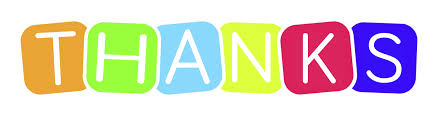